<img src="https://i.imgur.com/uDGD221.png" width=100%>
<br>

# PyTorch Homework 2 - Custom Dataset 및 DataLoader 생성
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />
<br>
<br>
<div align='right'><b>멘토 성민석(Minsuk Sung)</b></div>
<div align='right'>고려대학교 인공지능학과</div>
<div align='right'><a href="mailto:minsuksung@korea.ac.kr">minsuksung@korea.ac.kr</a></div>
<br>
<br>

> <font color='red'><b>WARNING</b></font>: 본 컨텐츠는 **[저작권법 제25조 제2항](https://glaw.scourt.go.kr/wsjo/lawod/sjo192.do?contId=2135829&jomunNo=25)** 에 의해 강의 목적으로 이용한 저작물이 포함되어 있습니다.  
> 해당 자료를 <font color='red'><b>외부에 임의로 공개 및 수정하는 것을 금지</b></font>하며 이를 위반하는 경우 저작권 침해로서 관련법에 따라 처벌될 수 있습니다.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#과제를-위한-라이브러리" data-toc-modified-id="과제를-위한-라이브러리-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>과제를 위한 라이브러리</a></span></li><li><span><a href="#과제를-위한-옵션" data-toc-modified-id="과제를-위한-옵션-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>과제를 위한 옵션</a></span></li><li><span><a href="#과제-표시" data-toc-modified-id="과제-표시-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>과제 표시</a></span></li><li><span><a href="#이번-과제를-통해서-얻을-수-있는-것" data-toc-modified-id="이번-과제를-통해서-얻을-수-있는-것-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>이번 과제를 통해서 얻을 수 있는 것</a></span></li></ul></li><li><span><a href="#PyTorch의-Dataset" data-toc-modified-id="PyTorch의-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PyTorch의 Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-관련-모듈-알아보기" data-toc-modified-id="Dataset-관련-모듈-알아보기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset 관련 모듈 알아보기</a></span></li><li><span><a href="#Dataset의-기본-구성-요소" data-toc-modified-id="Dataset의-기본-구성-요소-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dataset의 기본 구성 요소</a></span><ul class="toc-item"><li><span><a href="#__init__-메서드" data-toc-modified-id="__init__-메서드-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><code>__init__</code> 메서드</a></span></li><li><span><a href="#__len__-메서드" data-toc-modified-id="__len__-메서드-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><code>__len__</code> 메서드</a></span></li><li><span><a href="#__getitem__-메서드" data-toc-modified-id="__getitem__-메서드-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>__getitem__</code> 메서드</a></span></li><li><span><a href="#그-외-메서드" data-toc-modified-id="그-외-메서드-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>그 외 메서드</a></span></li><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li></ul></li></ul></li><li><span><a href="#PyTorch의-DataLoader" data-toc-modified-id="PyTorch의-DataLoader-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PyTorch의 DataLoader</a></span><ul class="toc-item"><li><span><a href="#DataLoader의-기본-구성-요소" data-toc-modified-id="DataLoader의-기본-구성-요소-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DataLoader의 기본 구성 요소</a></span><ul class="toc-item"><li><span><a href="#dataset" data-toc-modified-id="dataset-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>dataset</a></span></li><li><span><a href="#batch_size" data-toc-modified-id="batch_size-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>batch_size</a></span></li><li><span><a href="#shuffle" data-toc-modified-id="shuffle-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>shuffle</a></span></li><li><span><a href="#sampler-/-batch_sampler" data-toc-modified-id="sampler-/-batch_sampler-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>sampler / batch_sampler</a></span></li><li><span><a href="#num_workers" data-toc-modified-id="num_workers-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>num_workers</a></span></li><li><span><a href="#collate_fn" data-toc-modified-id="collate_fn-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>collate_fn</a></span></li><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li><li><span><a href="#pin_memory" data-toc-modified-id="pin_memory-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>pin_memory</a></span></li><li><span><a href="#drop_last" data-toc-modified-id="drop_last-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>drop_last</a></span></li><li><span><a href="#time_out" data-toc-modified-id="time_out-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>time_out</a></span></li><li><span><a href="#worker_init_fn" data-toc-modified-id="worker_init_fn-3.1.11"><span class="toc-item-num">3.1.11&nbsp;&nbsp;</span>worker_init_fn</a></span></li></ul></li><li><span><a href="#torchvision에서-제공하는-몇가지-transform-함수" data-toc-modified-id="torchvision에서-제공하는-몇가지-transform-함수-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>torchvision에서 제공하는 몇가지 transform 함수</a></span><ul class="toc-item"><li><span><a href="#transforms.Resize" data-toc-modified-id="transforms.Resize-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>transforms.<a href="https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize" target="_blank">Resize</a></a></span></li><li><span><a href="#transforms.RandomCrop" data-toc-modified-id="transforms.RandomCrop-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>transforms.<a href="https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomCrop" target="_blank">RandomCrop</a></a></span></li><li><span><a href="#transforms.RandomRotation" data-toc-modified-id="transforms.RandomRotation-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>transforms.<a href="https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation" target="_blank">RandomRotation</a></a></span></li><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li><li><span><a href="#transforms.ToTensor" data-toc-modified-id="transforms.ToTensor-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>transforms.ToTensor</a></span></li><li><span><a href="#여러-transforms을-한꺼번에!-Compose" data-toc-modified-id="여러-transforms을-한꺼번에!-Compose-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>여러 transforms을 한꺼번에! Compose</a></span></li><li><span><a href="#그-외-여러가지-transforms" data-toc-modified-id="그-외-여러가지-transforms-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>그 외 여러가지 transforms</a></span></li></ul></li></ul></li><li><span><a href="#PyTorch의-여러가지-Dataset" data-toc-modified-id="PyTorch의-여러가지-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PyTorch의 여러가지 Dataset</a></span><ul class="toc-item"><li><span><a href="#torchvision에서의-Dataset" data-toc-modified-id="torchvision에서의-Dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>torchvision에서의 Dataset</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#MNIST-Dataset" data-toc-modified-id="MNIST-Dataset-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>MNIST Dataset</a></span></li><li><span><a href="#MNIST-DataLoader" data-toc-modified-id="MNIST-DataLoader-4.1.1.2"><span class="toc-item-num">4.1.1.2&nbsp;&nbsp;</span>MNIST DataLoader</a></span></li></ul></li><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li></ul></li><li><span><a href="#torchtext에서의-Dataset" data-toc-modified-id="torchtext에서의-Dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>torchtext에서의 Dataset</a></span><ul class="toc-item"><li><span><a href="#AG_NEWS" data-toc-modified-id="AG_NEWS-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>AG_NEWS</a></span><ul class="toc-item"><li><span><a href="#AG_NEWS-Dataset" data-toc-modified-id="AG_NEWS-Dataset-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>AG_NEWS Dataset</a></span></li><li><span><a href="#AG_NEWS-DataLoader" data-toc-modified-id="AG_NEWS-DataLoader-4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span>AG_NEWS DataLoader</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#PyTorch의-Custom-Dataset-과-DataLoader" data-toc-modified-id="PyTorch의-Custom-Dataset-과-DataLoader-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PyTorch의 Custom Dataset 과 DataLoader</a></span><ul class="toc-item"><li><span><a href="#(정형-데이터)-Titanic-데이터로-Dataset과-DataLoader-만들어보기" data-toc-modified-id="(정형-데이터)-Titanic-데이터로-Dataset과-DataLoader-만들어보기-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>(정형 데이터) Titanic 데이터로 Dataset과 DataLoader 만들어보기</a></span><ul class="toc-item"><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li></ul></li><li><span><a href="#(이미지-데이터)-MNIST-데이터로-Dataset과-DataLoader-만들어보기" data-toc-modified-id="(이미지-데이터)-MNIST-데이터로-Dataset과-DataLoader-만들어보기-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>(이미지 데이터) MNIST 데이터로 Dataset과 DataLoader 만들어보기</a></span><ul class="toc-item"><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li></ul></li><li><span><a href="#(텍스트-데이터)-AG_NEWS-데이터를-이용하여-Dataset과-DataLoader-만들어보기" data-toc-modified-id="(텍스트-데이터)-AG_NEWS-데이터를-이용하여-Dataset과-DataLoader-만들어보기-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>(텍스트 데이터) AG_NEWS 데이터를 이용하여 Dataset과 DataLoader 만들어보기</a></span><ul class="toc-item"><li><span><a href="#과제-HOMEWORK" data-toc-modified-id="과제-HOMEWORK-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span><font color="#5F71F7">과제 HOMEWORK</font></a></span></li></ul></li></ul></li><li><span><a href="#요약-및-정리" data-toc-modified-id="요약-및-정리-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>요약 및 정리</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#DataLoader" data-toc-modified-id="DataLoader-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>DataLoader</a></span></li><li><span><a href="#일반적인-학습-과정" data-toc-modified-id="일반적인-학습-과정-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>일반적인 학습 과정</a></span></li></ul></li><li><span><a href="#QnA" data-toc-modified-id="QnA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>QnA</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

## Introduction
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />

> 이번 과제에서는 PyTorch의 Dataset을 구성하는 기본 요소를 파악하고 이를 활용하는 방법에 대해서 알아봅시다! 과제를 하시다가 막히시는 부분이 있다면 언제든 slack 채널을 통해서 질문주시길 바랍니다!

### 과제를 위한 라이브러리
---
해당 과제는 Google Colab에서 기본적으로 설치되어있는 `torch`의 버전으로 작성되었습니다.

In [2]:
import os
import sys
import gzip
import random
import platform
import warnings
import collections
from tqdm import tqdm, tqdm_notebook

In [3]:
import re
import requests
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_iris

In [4]:
import torch
import torchtext
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils

In [5]:
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler

### 과제를 위한 옵션
---

해당 과제는 Python 3.7 그리고 PyTorch 1.9.0, torchvision Version: 0.10.0 버전으로 작성되어 있습니다.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
os.makedirs('data', exist_ok=True)

In [10]:
# Set random seed
SEED = 2021
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)  # type: ignore
torch.backends.cudnn.deterministic = True  # type: ignore
torch.backends.cudnn.benchmark = True  # type: ignore

In [11]:
# 현재 OS 및 라이브러리 버전 체크 체크
current_os = platform.system()
print(f"Current OS: {current_os}")
print(f"CUDA: {torch.cuda.is_available()}")
print(f"Python Version: {platform.python_version()}")
print(f"torch Version: {torch.__version__}")
print(f"torchvision Version: {torchvision.__version__}")

# 중요하지 않은 에러 무시
warnings.filterwarnings(action='ignore')

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

Current OS: Linux
CUDA: True
Python Version: 3.7.11
torch Version: 1.9.0+cu102
torchvision Version: 0.10.0+cu102


### 과제 표시
이번 과제는 문제 풀이보다 내용을 이해하는데 중점적으로 집중하시길 바래요. 절대 어렵지 않게 구성했으니 부담 갖지 마시고 따라오세요.
> <font color='red'><b>HINT</b></font> :  <font color='#5F71F7'>과제 HOMEWORK</font> 라는 키워드로 표시해두었습니다. `Ctrl + F`로 찾아주세요. 최대한 어렵지 않게 구성하려고 했습니다.

### 이번 과제를 통해서 얻을 수 있는 것
지난 과제까지는 자신만의 모델을 생성하는 단계까지 공부했습니다. 이번 과제에서는 그렇게 생성한 모델을 학습시키기 위해서 데이터를 공급해주는 데이터셋과 데이터로더와 관련해서 공부하는 단계입니다. 이번 과제까지 잘 따라오신다면 마지막 선택 과제까지 무리없이 달려나갈 수 있으실거에요!

```python
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader 
from network import CustomNet
from dataset import ExampleDataset
from loss import ExampleLoss

###############################
# 첫번째 과제 Custom modeling #
###############################

# 모델 생성
model = CustomNet()
model.train()

# 옵티마이저 정의
params = [param for param in model.parameters() if param.requires_grad]
optimizer = optim.Example(params, lr=lr)

# 손실함수 정의
loss_fn = ExampleLoss()

###########################################
# 두번째 과제 Custom Dataset & DataLoader # -> 이번에는 공부하실 부분입니다!!
###########################################

# 학습을 위한 데이터셋 생성
dataset_example = ExampleDataset()

# 학습을 위한 데이터로더 생성
dataloader_example = DataLoader(dataset_example)

##########################################################
# 세번째 과제 Transfer Learning & Hyper Parameter Tuning # 
##########################################################
for e in range(epochs):
    for X,y in dataloader_example:
        output = model(X)
        loss = loss_fn(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

## PyTorch의 Dataset
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />

딥러닝 하기 전에 학습시킬 데이터를 준비하는 것은 사실 모델을 학습하는 것만큼 충분히 복잡합니다. 파이토치는 멀티 스레딩을 통한 데이터 병렬화, 데이터 증식 및 배치 처리와 같은 여러 복잡한 작업을 추상화하는 여러 유틸리티 클래스를 제공합니다.

### Dataset 관련 모듈 알아보기
---
PyTorch에서 데이터를 다루기 위한 몇 가지 모듈을 알아보겠습니다.

1. [`torch.utils.data`](https://pytorch.org/docs/stable/data.html): 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르고 섞는데 쓰는 도구들이 들어있는 모듈입니다. 파이토치 모델을 학습시키기 위한 데이터셋의 표준을 `torch.utils.data.Dataset`에 정의합니다. Dataset 모듈을 상속하는 파생 클래스는 학습에 필요한 데이터를 로딩해주는 `torch.utils.data.DataLoader` 인스턴스의 입력으로 사용할 수 있습니다.
2. [`torchvision.dataset`](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset): `torch.utils.data.Dataset`을 상속하는 이미지 데이터셋의 모음입니다. MNIST나 CIFAR-10과 같은 데이터셋을 제공해줍니다.
3. [`torchtext.dataset`](https://pytorch.org/text/stable/datasets.html): `torch.utils.data.Dataset`을 상속하는 텍스트 데이터셋의 모음입니다. 기본적으로 IMDb나 AG_NEWS와 같은 데이터셋을 제공해줍니다. 
4. [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html): 이미지 데이터셋에 쓸 수 있는 여러 가지 변환 필터를 담고 있는 모듈입니다. 예를 들어 Tensor로 변환한다던지, 크기 조절(Resize)과 잘라내기(Crop)으로 이미지를 수정할 수 있고 밝기(Brightness)와 같은 값을 조절하는데 사용될 수 있습니다.
5. [`torchvision.utils`](https://pytorch.org/vision/stable/utils.html): 이미지 데이터를 저장하고 시각화하기 위한 도구가 들어있는 모듈입니다.

참고: 펭귄브로의 3분 딥러닝, 파이토치맛

### Dataset의 기본 구성 요소
---

기본적으로 Dataset을 구성할 때는 PyTorch의 `torch.utils.data`에서 **`Dataset 클래스`를 상속**해서 만듭니다. 이렇게 생성된 Dataset 클래스는 크게 아래와 같이 3가지 메서드로 구성됩니다. `__init__` 메서드와 `__len__` 메서드와 마지막으로 `__getitem__` 메서드로 구성됩니다. 이런 방식은 `map-style dataset`과 같은 Dataset일때에만 가능합니다. 보다 자세한 내용은 [PyTorch Documentations](https://pytorch.org/docs/stable/data.html#dataset-types) 참고하세요.

```python
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self,):
        pass

    def __len__(self):
        pass
    
    def __getitem__(self, idx):
        pass
```

#### `__init__` 메서드
일반적으로 해당 메서드에서는 데이터의 위치나 파일명과 같은 초기화 작업을 위해 동작합니다. 일반적으로 CSV파일이나 XML파일과 같은 데이터를 이때 불러옵니다. 이렇게 함으로써 모든 데이터를 메모리에 로드하지 않고 효율적으로 사용할 수 있습니다. 여기에 이미지를 처리할 transforms들을 Compose해서 정의해둡니다.

#### `__len__` 메서드
해당 메서드는 Dataset의 최대 요소 수를 반환하는데 사용됩니다. 해당 메서드를 통해서 현재 불러오는 데이터의 인덱스가 적절한 범위 안에 있는지 확인할 수 있습니다.

#### `__getitem__` 메서드
해당 메서드는 데이터셋의 idx번째 데이터를 반환하는데 사용됩니다. 일반적으로 원본 데이터를 가져와서 전처리하고 데이터 증강하는 부분이 모두 여기에서 진행될 겁니다. 이는 이후 transform 하는 방법들에 대해서 간단히 알려드리겠습니다.

#### 그 외 메서드
추가적으로 학습시 Dataset에서 필요한만한 정보 (e.g. labels, target class) 를 가져오는 메서드를 정의하는 것과 같은 메서드를 정의해도 됩니다.

#### <font color='#5F71F7'>과제 HOMEWORK</font>

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>scikit-learn에서 제공하는 붓꽃 데이터를 이용해서 간단한 Dataset을 만들어봅시다.</li>
    </ul>
    <br>
    <b> 해야할 일</b>
    <ul>
        <li>__init__메서드: 데이터를 불러오고 변수 X에는 feature를, 변수 y에는 target을 넣어주세요.</li>
        <li>__len__메서드: 데이터의 총 갯수를 반환해주세요.</li>
        <li>__getitem__메서드: idx가 주어질 때, X와 y를 반환해주세요.</li>
    </ul>
</div>

아래와 같은 표에서 한 행씩 반환해줄 수 있는 Dataset을 만들 예정입니다.

In [12]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df
print(len(iris['data']))

150


아래의 `IrisDataset`을 완성시켜주세요.

In [20]:
class IrisDataset(Dataset):
    def __init__(self):
        iris = load_iris()
        self.X = iris['data']
        self.y = iris['target']
        self.feature_names = iris['feature_names']
        ######################################TODO######################################
        
        ################################################################################

    def __len__(self):
        len_dataset = None
        ######################################TODO######################################
        len_dataset = len(iris['target'])
        ################################################################################
        return len_dataset

    def __getitem__(self, idx):
        X, y = None, None
        ######################################TODO######################################
        X = self.X[idx]
        y = self.y[idx]
        ################################################################################
        return X, y

아마도 여러분께서 과제를 해결하셨다면 아래의 예제를 계속해서 따라갈 수 있을겁니다!

In [206]:
dataset_iris = IrisDataset()
next(iter(dataset_iris))
print(dataset_iris.X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

현재 10개의 데이터가 랜덤하게 생성되어 있는 것을 확인하실 수 있습니다.

In [15]:
len(dataset_iris)

150

직접 인덱스로 접근해서 첫번째 데이터를 가져와봅시다. `__getitem__`메서드를 통해서 나온 X와 y값이 잘 나온 것을 확인하실 수 있습니다.

> 들여쓴 블록



In [16]:
dataset_iris[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

간단하게 IrisDataset으로 시각화도 진행해볼까요?

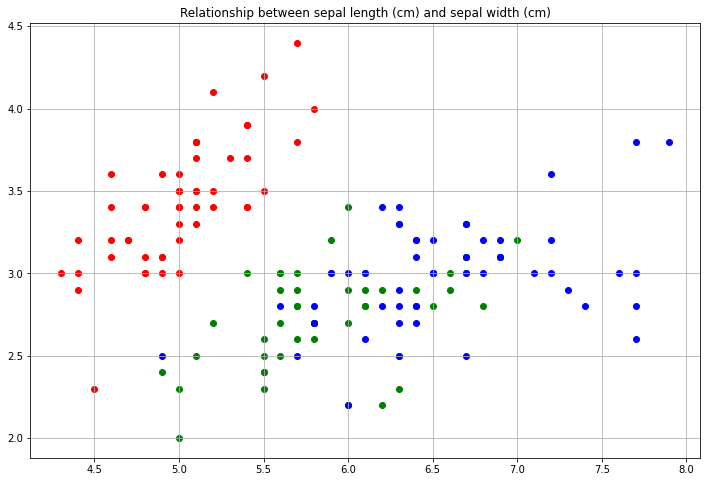

In [22]:
plt.figure(figsize=(12,8))
colors = ['r','g','b']
for n, c in enumerate(dataset_iris.y):
    plt.scatter(dataset_iris.X[n,0], dataset_iris.X[n,1], color=colors[c])
plt.title('Relationship between {} and {}'.format(dataset_iris.feature_names[0],
                                                  dataset_iris.feature_names[1]))
plt.grid(True)
plt.show()

## PyTorch의 DataLoader
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />

앞에서 Dataset을 만들어보았다면 이제는 모델 학습을 위한 DataLoader를 만들어볼 차례입니다. 전혀 어렵지 않으니 차근차근 따라오세요!

### DataLoader의 기본 구성 요소
---
Dataloader는 모델 학습을 위해서 데이터를 미니 배치(Mini batch)단위로 제공해주는 역할을 합니다. [PyTorch Documentations](https://pytorch.org/docs/stable/data.html)을 확인해보면 아래와 같이 `DataLoader`가 정의되어 있는 걸 확인할 수 있습니다. 여기서 dataset은 앞서 우리가 만든 `Dataset`을 인자로 넣어주시면 됩니다! 보통 `batch_size`나 `collate_fn`와 같은 인자를 주로 사용할겁니다!

```python
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
```

> <font color='red'>WAIT!</font> : 아래 내용은 [Hulk님의 블로그](https://hulk89.github.io/pytorch/2019/09/30/pytorch_dataset/)와 [안수빈님의 블로그](https://subinium.github.io/pytorch-dataloader/)를 참고하여 만들었습니다. 

#### dataset
DataLoader에는 앞서 생성한 Dataset 인스턴스가 들어갑니다.

In [26]:
next(iter(DataLoader(dataset_iris)))


[tensor([[5.1000, 3.5000, 1.4000, 0.2000]], dtype=torch.float64), tensor([0])]

#### batch_size
인자가 나타내고 있는 뜻 그대로 배치 사이즈를 의미합니다.

In [27]:
next(iter(DataLoader(dataset_iris, batch_size=4)))

[tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000]], dtype=torch.float64),
 tensor([0, 0, 0, 0])]

#### shuffle
데이터를 DataLoader에서 섞어서 사용하겠는지를 설정할 수 있습니다. 앞선 경우와 다르게 데이터가 섞인 것을 확인하실 수 있습니다.

In [28]:
next(iter(DataLoader(dataset_iris, shuffle=True, batch_size=4)))

[tensor([[5.8000, 4.0000, 1.2000, 0.2000],
         [6.3000, 3.3000, 6.0000, 2.5000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [6.4000, 2.8000, 5.6000, 2.1000]], dtype=torch.float64),
 tensor([0, 2, 0, 2])]

#### sampler / batch_sampler
sampler는 index를 컨트롤하는 방법입니다. 데이터의 index를 원하는 방식대로 조정합니다. 즉 index를 컨트롤하기 때문에 설정하고 싶다면 shuffle 파라미터는 False(기본값)여야 합니다.

> map-style에서 컨트롤하기 위해 사용하며 `__len__`과 `__iter__`를 구현하면 됩니다. 그 외의 미리 선언된 Sampler는 다음과 같습니다.

- SequentialSampler : 항상 같은 순서
- RandomSampler : 랜덤, replacemetn 여부 선택 가능, 개수 선택 가능
- SubsetRandomSampler : 랜덤 리스트, 위와 두 조건 불가능
- WeigthRandomSampler : 가중치에 따른 확률
- BatchSampler : batch단위로 sampling 가능
- DistributedSampler : 분산처리 (torch.nn.parallel.DistributedDataParallel과 함께 사용)

불균형 데이터셋의 경우, 클래스의 비율에 맞게끔 데이터를 제공해야할 필요가 있습니다. 이럴 때 사용하는 옵션이 sampler입니다.

> <font color='red'><b>HINT</b></font>: sampler나 batch_sampler와 관련하여 조금 더 많은 예시를 보고 싶다면 [여기](https://towardsdatascience.com/pytorch-basics-sampling-samplers-2a0f29f0bf2a)를 살펴보세요!

그러면 shuffle와 sampler의 차이는 무엇일까요?

#### num_workers
데이터를 불러올때 사용하는 서브 프로세스(subprocess) 개수입니다. 기존 데이터셋보다 훨씬 큰 데이터셋을 생성해봅시다. 

In [29]:
class RandomDataset(Dataset):
    def __init__(self, tot_len=10, n_features=1):
        self.X = torch.rand((tot_len, n_features))
        self.y = torch.randint(0, 3, size=(tot_len, ))  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.X[idx])
        y = self.y[idx]
        return x, y

In [36]:
dataset_big_random = RandomDataset(tot_len=1000)  # 점점 큰 값을 설정해보시면 더욱 확실히 체감되실 겁니다!

In [34]:
%%time
for data, label in DataLoader(dataset_big_random, num_workers=1):
    pass

CPU times: user 1min 40s, sys: 37.1 s, total: 2min 17s
Wall time: 3min 28s


In [35]:
%%time
for data, label in DataLoader(dataset_big_random, num_workers=4):
    pass

CPU times: user 1min 36s, sys: 37.8 s, total: 2min 14s
Wall time: 3min 15s


> <font color='red'><b>HINT</b></font>: 무작정 `num_workers`를 높인다고 좋진 않습니다! 데이터를 불러 CPU와 GPU 사이에서 많은 교류가 일어나면 오히려 `병목`이 생길 수 있습니다. [참고](https://jybaek.tistory.com/799)

<img src="https://blog.kakaocdn.net/dn/EzN5Y/btqDZZCZt0G/ct7x36U2cg6iFx7W0eC9U0/img.png" width=50%>
<a href='https://deepinsight.tistory.com/106'><div align='center'>이미지 출처: Steve-Lee's Deep Insight 티스토리 블로그</div></a>

#### collate_fn
생각보다 많이 쓰는 옵션입니다. 보통 map-style 데이터셋에서 sample list를 batch 단위로 바꾸기 위해 필요한 기능입니다. zero-padding이나 Variable Size 데이터 등 `데이터 사이즈를 맞추기` 위해 많이 사용합니다.

참고: https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/03_01_dataloader.html

> <font color='red'><b>HINT</b></font>: `collate`는 '함께 합치다'라는 의미입니다

직관적인 예시로는 프린터기에서 인쇄할때, `묶어서 인쇄하기`와 같은 기능이라고 생각하면 됩니다.  
즉, ((피처1, 라벨1) (피처2, 라벨2))와 같은 배치 단위 데이터가 ((피처1, 피처2), (라벨1, 라벨2))와 같이 바뀝니다.

<img src="https://www.coastalcreative.com/wp-content/uploads/2019/10/collated-not-collated-543x600.jpg" width=50%>
<a href='https://www.coastalcreative.com/wp-content/uploads/2019/10/collated-not-collated-543x600.jpg'><div align='center'>이미지 출처: https://coastalcreative.com</div></a>

In [37]:
dataset_random = RandomDataset(tot_len=10)

In [38]:
def collate_fn(batch):
    print('Original:\n', batch)
    print('-'*100)
    
    data_list, label_list = [], []
    
    for _data, _label in batch:
        data_list.append(_data)
        label_list.append(_label)
    
    print('Collated:\n', [torch.Tensor(data_list), torch.LongTensor(label_list)])
    print('-'*100)
    
    return torch.Tensor(data_list), torch.LongTensor(label_list)

여기서 결과를 확인해보면 이제 feature끼리, label끼리 합쳐진 것을 확인하실 수 있습니다.

In [52]:
next(iter(DataLoader(dataset_random, collate_fn=collate_fn, batch_size=4)))

Original:
 [(tensor([0.6589]), tensor(2)), (tensor([0.1167]), tensor(1)), (tensor([0.3462]), tensor(2)), (tensor([0.3835]), tensor(0))]
----------------------------------------------------------------------------------------------------
Collated:
 [tensor([0.6589, 0.1167, 0.3462, 0.3835]), tensor([2, 1, 2, 0])]
----------------------------------------------------------------------------------------------------


(tensor([0.6589, 0.1167, 0.3462, 0.3835]), tensor([2, 1, 2, 0]))

#### <font color='#5F71F7'>과제 HOMEWORK</font>

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>위에서 배운 collate_fn을 활용하여 봅시다!</li>
        <li>아래 예시로 만든 Dataset의 경우는 batch_size를 2이상으로 설정하면 에러가 발생합니다.</li>
    </ul>
    <br>
    <b> 해야할 일 </b>
    <ul>
        <li>collate_fn을 완성하여 하나의 batch에는 동일한 길이를 반환할 수 있도록 만드세요.</li>
        <li>하나의 batch에서 가장 길이가 긴 sample 기준으로 길이를 맞춥니다.</li>
        <li>길이를 맞출 때는 비어있는 오른쪽을 0으로 패딩합니다.ex) 1 1 1  -> 1 1 1 0 0 0</li>
    </ul>
    <br>
    <b> 예시 </b>
    <pre><code>
        tensor([[0., 0.],
                [1., 1.]]) tensor([0., 1.])
        tensor([[2., 2., 2., 0.],
                [3., 3., 3., 3.]]) tensor([2., 3.])
        tensor([[4., 4., 4., 4., 4., 0.],
                [5., 5., 5., 5., 5., 5.]]) tensor([4., 5.])
        tensor([[6., 6., 6., 6., 6., 6., 6., 0.],
                [7., 7., 7., 7., 7., 7., 7., 7.]]) tensor([6., 7.])
        tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8., 0.],
                [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]) tensor([8., 9.])
    </code></pre>
    
</div>

In [40]:
class ExampleDataset(Dataset):
    def __init__(self, num):
        self.num = num
    
    def __len__(self):
        return self.num
    
    def __getitem__(self, idx):
        return {"X":torch.tensor([idx] * (idx+1), dtype=torch.float32), 
                "y": torch.tensor(idx, dtype=torch.float32)}

In [45]:
dataset_example = ExampleDataset(10)
print(dataset_example[2])

{'X': tensor([2., 2., 2.]), 'y': tensor(2.)}


지금은 batch_size값이 1이기 때문에 문제가 없는 것처럼 보입니다.

In [54]:
dataloader_example = torch.utils.data.DataLoader(dataset_example)
for d in dataloader_example:
    print(d['X'],d['y'])

tensor([[0.]]) tensor([0.])
tensor([[1., 1.]]) tensor([1.])
tensor([[2., 2., 2.]]) tensor([2.])
tensor([[3., 3., 3., 3.]]) tensor([3.])
tensor([[4., 4., 4., 4., 4.]]) tensor([4.])
tensor([[5., 5., 5., 5., 5., 5.]]) tensor([5.])
tensor([[6., 6., 6., 6., 6., 6., 6.]]) tensor([6.])
tensor([[7., 7., 7., 7., 7., 7., 7., 7.]]) tensor([7.])
tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8.]]) tensor([8.])
tensor([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]) tensor([9.])


하지만! 아래와 같이 batch_size를 2이상으로 설정하면 에러가 발생합니다.

```python
dataloader_example = torch.utils.data.DataLoader(dataset_example, batch_size=2)
for d in dataloader_example:
    print(d['X'])
```

```python
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-30-dcb26b561383> in <module>
      1 dataloader_example = torch.utils.data.DataLoader(dataset_example, batch_size=2)
----> 2 for d in dataloader_example:
      3     print(d['X'])

... 중략 ...

~/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py in default_collate(batch)
     54             storage = elem.storage()._new_shared(numel)
     55             out = elem.new(storage)
---> 56         return torch.stack(batch, 0, out=out)
     57     elif elem_type.__module__ == 'numpy' and elem_type.__name__ != 'str_' \
     58             and elem_type.__name__ != 'string_':

RuntimeError: stack expects each tensor to be equal size, but got [1] at entry 0 and [2] at entry 1

```

이번 과제는 아래의 함수를 완성하여 batch_size값이 2이상일때도 정상적으로 돌아가게끔 만들어주세요! 예를 들어, batch_size=2로 설정할 경우, 아래와 같이 나오게 만들어주세요!
```python
tensor([[0., 0.],
        [1., 1.]]) tensor([0., 1.])
tensor([[2., 2., 2., 0.],
        [3., 3., 3., 3.]]) tensor([2., 3.])
tensor([[4., 4., 4., 4., 4., 0.],
        [5., 5., 5., 5., 5., 5.]]) tensor([4., 5.])
tensor([[6., 6., 6., 6., 6., 6., 6., 0.],
        [7., 7., 7., 7., 7., 7., 7., 7.]]) tensor([6., 7.])
tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8., 0.],
        [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]) tensor([8., 9.])
```

In [76]:
def my_collate_fn(samples):
    collate_X = []
    collate_y = []
    ######################################TODO######################################
    batch_size = len(samples)
    X_size = 0
    for i in range(batch_size):
        if len(samples[i]['X']) > X_size:
            X_size = len(samples[i]['X'])

    for sample in samples:
        padding_size = X_size - len(sample['X'])    
        collate_X.append(torch.cat((sample['X'],torch.Tensor([0]*padding_size))))
        collate_y.append(sample['y'])
        
    
    ################################################################################
    return {'X': torch.stack(collate_X),
             'y': torch.stack(collate_y)}

In [77]:
dataloader_example = torch.utils.data.DataLoader(dataset_example, 
                                                 batch_size=2,
                                                 collate_fn=my_collate_fn)
for d in dataloader_example:
    print(d['X'], d['y'])

tensor([[0., 0.],
        [1., 1.]]) tensor([0., 1.])
tensor([[2., 2., 2., 0.],
        [3., 3., 3., 3.]]) tensor([2., 3.])
tensor([[4., 4., 4., 4., 4., 0.],
        [5., 5., 5., 5., 5., 5.]]) tensor([4., 5.])
tensor([[6., 6., 6., 6., 6., 6., 6., 0.],
        [7., 7., 7., 7., 7., 7., 7., 7.]]) tensor([6., 7.])
tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8., 0.],
        [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]) tensor([8., 9.])


#### pin_memory
DataLoader에서 이걸 `True`로 바꾸면 Tensor를 CUDA 고정 메모리에 할당시킵니다. 고정된 메모리에서 데이터를 가져오기 때문에 데이터 전송이 훨씬 빠릅니다. 하지만 일반적인 경우에는 많이 사용하지 않을 argument라서 이번 시간에는 스킵하도록 하겠습니다. 보다 자세한 기술적인 내용은 아래의 내용을 참고해주세요! 본 내용은 [출처1](https://mkblog.co.kr/2017/03/07/nvidia-gpu-pinned-host-memory-cuda/) 및 [출처2](https://medium.com/naver-shopping-dev/top-10-performance-tuning-practices-for-pytorch-e6c510152f76)에서 가져왔습니다.

- `Pageable Memory`: Memory 내용(contents)이 DRAM에서 하드디스크 (Secondary Storage Device)로 page out 되거나 반대로 하드디스크에서 DRAM으로 page in이 가능한 메모리를 의미합니다. Page in/Page out을 하기 위해서는 CPU (Host)의 도움이 필요하다고 합니다. 보통 OS에서 User Memory Space의 경우 Pageable Memory입니다.

- `Non-Pageable Memory`: Pageable Memory와 반대로 page in/page out이 불가능한 메모리를 Non-Pageable Memory라 합니다. 결과적으로 하드디스크로 데이터를 page out/page in 하는 작업이 필요없습니다. OS에서 Kernel Memory Space는 보통 Non-Pageable Memory라고 합니다.

<img src="https://miro.medium.com/max/700/1*HxXxttwZ4z_9PEv8ArS8eA.png" width=50%>
<a href='https://mkblog.co.kr/2017/03/07/nvidia-gpu-pinned-host-memory-cuda/'><div align='center'>이미지 출처: NVIDA Developer Blog</div></a>

#### drop_last
batch 단위로 데이터를 불러온다면, batch_size에 따라 마지막 batch의 길이가 달라질 수 있습니다. batch의 길이가 다른 경우에 따라 loss를 구하기 귀찮은 경우가 생기고, batch의 크기에 따른 의존도 높은 함수를 사용할 때 걱정이 되는 경우 마지막 batch를 사용하지 않을 수 있습니다.

In [78]:
for data, label in DataLoader(dataset_random, num_workers=1, batch_size=4):
    print(len(data))

4
4
2


drop_last가 `True`값으로 설정할 경우, 마지막 배치(2)가 생략되는 걸 확인하실 수 있습니다.

In [79]:
for data, label in DataLoader(dataset_random, num_workers=1, batch_size=4, drop_last=True):
    print(len(data))

4
4


#### time_out
양수로 주어지는 경우, DataLoader가 data를 불러오는데 제한시간입니다.

#### worker_init_fn
num_worker가 개수라면, 이 파라미터는 어떤 worker를 불러올 것인가를 리스트로 전달합니다.

### torchvision에서 제공하는 몇가지 transform 함수
---
transform을 하는 이유가 뭘까요? 딥러닝 학습을 위해선 고정된 입력값이 보장되어야 합니다. 하지만 수집한 모든 데이터의 크기가 동일하지 않을수도 있습니다. 가령 이미지의 같은 경우, 정사각형 형태의 이미지가 있는 반면에 직사각형 형태의 이미지가 있을 수 있죠. PyTorch에서는 특히 이미지의 경우, 이를 위해서 이미지를 Resize하는 함수 등을 제공합니다.

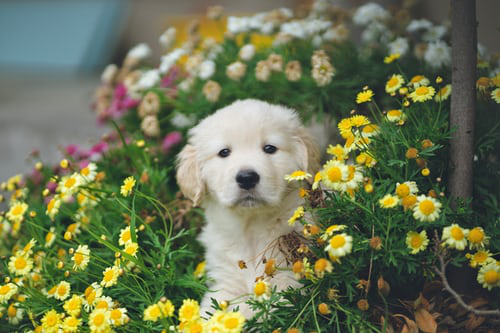

In [90]:
url = 'https://images.unsplash.com/photo-1583160247711-2191776b4b91?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTN8fGdvbGRlbnJldHJpZXZlcnxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60'
im = Image.open(requests.get(url, stream=True).raw)  # torchvision은 항상 PIL 객체로 받아야합니다!
im


#### transforms.[Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize)
영어 단어에서 유추할 수 있는 그대로 이미지의 사이즈를 변환합니다.
```python
torchvision.transforms.Resize(size, 
                              interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, 
                              max_size=None, 
                              antialias=None)
```

In [94]:
im = transforms.Resize((100,200))(im)


(200, 100)

#### transforms.[RandomCrop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomCrop)
지정된 이미지를 임의의 위치에서 자릅니다.

```python
torchvision.transforms.RandomCrop(size, 
                                  padding=None,
                                  pad_if_needed=False,
                                  fill=0, 
                                  padding_mode='constant')
```

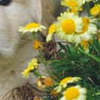

In [87]:
transforms.RandomCrop((100,100))(im)

####  transforms.[RandomRotation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation)
주어진 이미지를 임의의 각도만큼 회전시킵니다.

```python
torchvision.transforms.RandomRotation(degrees,
                                      interpolation=<InterpolationMode.NEAREST: 'nearest'>, 
                                      expand=False,
                                      center=None,
                                      fill=0, 
                                      resample=None)
```

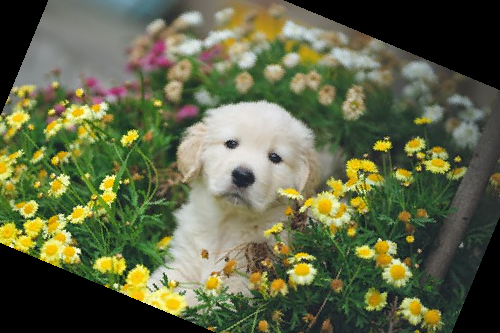

In [88]:
transforms.RandomRotation(30)(im)

#### <font color='#5F71F7'>과제 HOMEWORK</font>

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>
            위에서 배운 torchvision의 transform를 응용하여 아래의 조건에 맞게끔 변환하여 봅시다.
        </li>
    </ul>
    <br>
    <b> 해야할 일</b>
    <ul>
        <li>이미지의 사이즈를 (224,224)로 변환해주세요.(Resize)</li>
        <li>앞서 변환된 이미지를 수평선을 기준으로 상하로 뒤집어주세요.(RandomHorizontalFlip)</li>
        <li>앞서 변환된 이미지에서 중간 부분을 가로, 세로를 150만큼 잘라내어 주세요.(CenterCrop)</li>
    </ul>
</div>

In [127]:
def get_transforms_img(im):
    ######################################TODO######################################
    im = torchvision.transforms.Resize((224,224))(im)
    im = torchvision.transforms.RandomVerticalFlip()(im)
    im = torchvision.transforms.CenterCrop((150,150))(im)
    ################################################################################
    return im

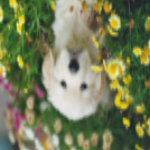

In [128]:
get_transforms_img(im)

#### transforms.ToTensor

In [129]:
transforms.ToTensor()(im)

tensor([[[0.3255, 0.3255, 0.3294,  ..., 0.2745, 0.2706, 0.2667],
         [0.3373, 0.3412, 0.3451,  ..., 0.2745, 0.2706, 0.2667],
         [0.3373, 0.3412, 0.3451,  ..., 0.2784, 0.2745, 0.2706],
         ...,
         [0.1608, 0.1647, 0.1686,  ..., 0.1725, 0.1686, 0.1686],
         [0.1608, 0.1882, 0.1804,  ..., 0.1725, 0.1608, 0.1647],
         [0.1647, 0.1725, 0.1686,  ..., 0.2314, 0.1922, 0.1804]],

        [[0.4196, 0.4235, 0.4275,  ..., 0.2706, 0.2706, 0.2706],
         [0.4510, 0.4510, 0.4549,  ..., 0.2706, 0.2706, 0.2706],
         [0.4706, 0.4745, 0.4784,  ..., 0.2745, 0.2745, 0.2745],
         ...,
         [0.2471, 0.2471, 0.2510,  ..., 0.1725, 0.1686, 0.1647],
         [0.2431, 0.2627, 0.2627,  ..., 0.1569, 0.1569, 0.1647],
         [0.2196, 0.2275, 0.2314,  ..., 0.1922, 0.1804, 0.1765]],

        [[0.4314, 0.4353, 0.4353,  ..., 0.2510, 0.2510, 0.2510],
         [0.4706, 0.4745, 0.4784,  ..., 0.2510, 0.2510, 0.2510],
         [0.5059, 0.5098, 0.5098,  ..., 0.2549, 0.2510, 0.

> <font color='red'><b>HINT</b></font>: 항상 PIL로 불러올 필요는 없습니다. `ToPILImage` 메서드를 이용하면 바로 array 스타일에서 불러올 수 있습니다.

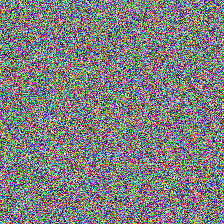

In [132]:
im_arr = torch.rand((3, 224, 224))  # cv.imread나 plt.imread 와 같은 함수와 같이 쓰임
im_pil = transforms.ToPILImage()(im_arr)
im_pil

#### 여러 transforms을 한꺼번에! Compose

사실 위 과제처럼 굳이 함수를 만들어서 처리할 필요 없습니다. torchvision에서는 Compose라는 함수를 통해서 여러 transforms들을 하나로 묶어서 처리해줄 수 있습니다.

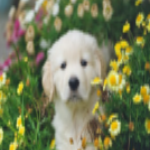

In [134]:
transforms.Compose([transforms.Resize((224,224)),
                    transforms.RandomHorizontalFlip(0.5),
                    transforms.CenterCrop(150)])(im)

#### 그 외 여러가지 transforms

앞서 소개드린 transforms 이외에도 정말 많은 transforms이 있습니다. 아래와 같이 수많은 transforms들이 있으니 한번 확인해보세요! 보다 자세한 내용은 뒤에 이어지는 컴퓨터 비전 강의에서 배워보도록 합시다.

In [ ]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

> <font color='red'><b>HINT</b></font>: 물론 torchvision에서 제공하는 transform 이외에도 [albumentations](https://github.com/albumentations-team/albumentations)과 같이 다양한 transform을 제공하는 라이브러리가 많습니다!  
> 하지만 이번 과제는 PyTorch에서의 Dataset과 DataLoader에 관련 되어있으므로 생략하겠습니다.

<img src="https://camo.githubusercontent.com/3bb6e4bb500d96ad7bb4e4047af22a63ddf3242a894adf55ebffd3e184e4d113/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62642f6e652f72762f62646e6572763563746b75646d73617a6e687734637273646669772e6a706567">

> <font color='red'><b>HINT</b></font>: 때로는 transformation에 의해서 input이 변하면 GT값이 변하는 경우가 있습니다. 예컨대 객체 인식(Object detection)의 경우, 물체의 위치 정보인 바운딩 박스(Bounding box)가 그렇습니다. 원본 이미지를 뒤집거나 회전시키면 그에 따라서 바운딩 박스도 좌표가 변환되어야 합니다. 이럴 경우 사용하는 입장에서는 매우 곤란한데요. 이런 골치 아픈 상황을 해결해주는 라이브러리도 있습니다. 바로 [imgaug](https://github.com/aleju/imgaug)를 소개합니다. 

```
$ pip install git+https://github.com/aleju/imgaug.git
```

<img src="https://i.imgur.com/7XrSCJZ.png[/img">

## PyTorch의 여러가지 Dataset
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />

### torchvision에서의 Dataset
---

#### MNIST

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스이며, 다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용됩니다. 이 데이터베이스는 또한 기계 학습 분야의 트레이닝 및 테스트에 널리 사용됩니다. NIST의 오리지널 데이터셋의 샘플을 재혼합하여 만들어졌습니다. NIST의 흑백 그림들은 28x28 픽셀의 바운딩 박스와 앤티엘리어싱 처리되어 그레이스케일 레벨이 들어가 있도록 평준화되었습니다.

출처: [위키백과](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)

##### MNIST Dataset

In [135]:
dataset_train_MNIST = torchvision.datasets.MNIST('data/MNIST/', # 다운로드 경로 지정
                                                 train=True, # True를 지정하면 훈련 데이터로 다운로드
                                                 transform=transforms.ToTensor(), # 텐서로 변환
                                                 download=True, 
                                                )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



In [137]:
dataset_train_MNIST

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [138]:
len(dataset_train_MNIST)

60000

In [139]:
dataset_train_MNIST.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [146]:
image, label = next(iter(dataset_train_MNIST))
image, label
len(image.numpy()[0])

28

In [151]:
pd.DataFrame(np.int32(image.numpy()[0]*255)).style.set_properties(**{'font-size':'3pt'}).background_gradient(axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


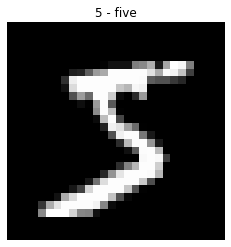

In [154]:
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.title("{}".format(dataset_train_MNIST.classes[label]))
plt.axis('off')
plt.show()

##### MNIST DataLoader

In [155]:
dataloader_train_MNIST = DataLoader(dataset=dataset_train_MNIST,
                                    batch_size=16,
                                    shuffle=True,
                                    num_workers=4,
                                   )

In [156]:
images, labels = next(iter(dataloader_train_MNIST))

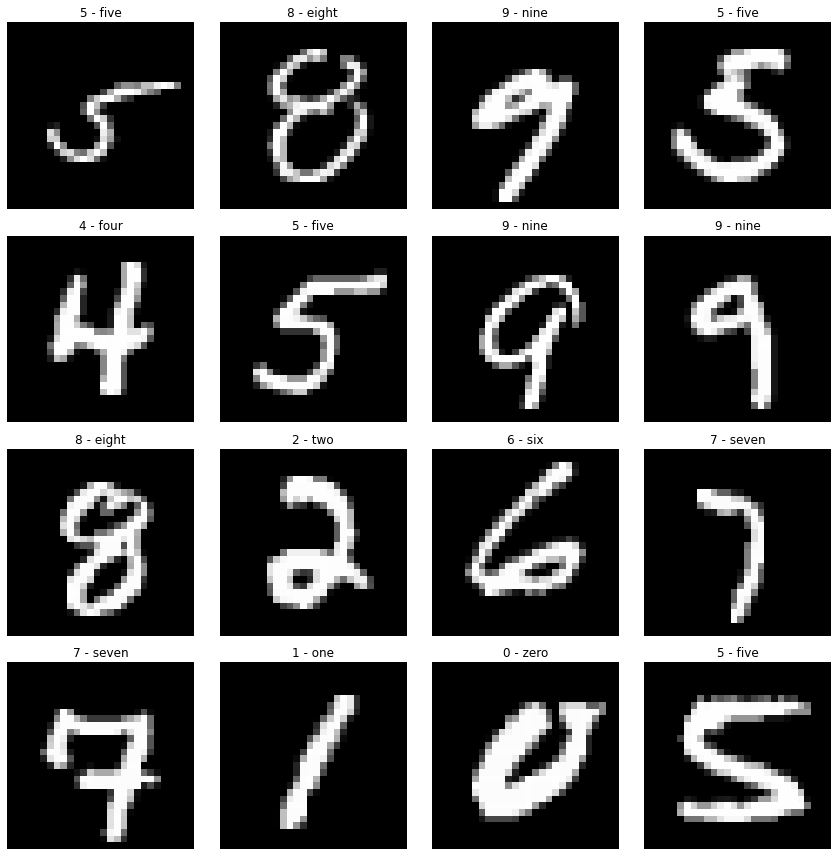

In [159]:
plt.figure(figsize=(12,12))
for n, (image, label) in enumerate(zip(images, labels), start=1):
    plt.subplot(4,4,n)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title("{}".format(dataset_train_MNIST.classes[label]))
    plt.axis('off')
plt.tight_layout()
plt.show()    

> <font color='red'><b>HINT</b></font>: `random_split`을 이용해서 Train / Validatoin 데이터셋도 손쉽게 분할 가능합니다.

#### <font color='#5F71F7'>과제 HOMEWORK</font>

CIFAR-10 데이터 세트는 클래스당 6000개의 이미지를 포함하여 10개 클래스의 60000 32x32 컬러 이미지로 구성됩니다. 교육용 이미지 50000개와 테스트 이미지 10000개가 있습니다. 데이터 세트는 각각 10000개의 이미지로 구성된 5개의 교육 배치와 1개의 테스트 배치로 나뉩니다. 테스트 배치에는 각 클래스에서 랜덤으로 선택한 정확히 1000개의 이미지가 포함됩니다. 교육 배치에는 나머지 이미지가 임의 순서대로 포함되지만 일부 교육 배치에는 한 클래스의 이미지가 다른 클래스보다 더 많이 포함될 수 있습니다. 이들 사이에 교육 배치에는 각 클래스의 이미지가 정확히 5000개 포함되어 있습니다.

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>
            MNIST와 함께 가장 유명한 데이터셋인 CIFAR-10 데이터셋을 가져와봅시다.
        </li>
    </ul>
    <br>
    <b> 해야할 일</b>
    <ul>
        <li>torchvision.datasets에서 가져와주세요.</li>
        <li>transform인자에는 Compose를 이용하여 RandomHorizontalFlip, ToTensor 및 Normailze를 넣어주세요.이 때, mean, std는 모두 0.5로 통일하겠습니다.</li>
        <li>데이터 다운로드 경로는 data/CIFAR10/로 해주세요.</li>
    </ul>
</div>

<img src="https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=50%>

In [160]:
# 딱 한줄만 적으면 과제 끝!
dataset_train_CIFAR10 = torchvision.datasets.CIFAR10('data/CIFAR10/',
                                                     train=True,
                                                     transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                                                   transforms.ToTensor(),
                                                                                   transforms.Normalize(0.5,0.5)]),
                                                     download=True
                                                     )
                                                                                   

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/CIFAR10/cifar-10-python.tar.gz to data/CIFAR10/


In [161]:
dataset_train_CIFAR10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/CIFAR10/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [162]:
len(dataset_train_CIFAR10)

50000

In [163]:
dataset_train_CIFAR10.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [164]:
image, label = next(iter(dataset_train_CIFAR10))
image, label

(tensor([[[ 0.1608,  0.1922,  0.2392,  ..., -0.6078, -0.6627, -0.5373],
          [-0.0431, -0.0667, -0.0353,  ..., -0.8588, -1.0000, -0.8745],
          [-0.1451, -0.0588, -0.0745,  ..., -0.6157, -0.8745, -0.8039],
          ...,
          [-0.5843, -0.5608,  0.2549,  ...,  0.5529,  0.5765,  0.6314],
          [-0.3490, -0.2392,  0.4431,  ...,  0.4588,  0.3569,  0.4118],
          [-0.0353,  0.1843,  0.6941,  ...,  0.4039,  0.3176,  0.3882]],
 
         [[-0.0275, -0.0196,  0.0353,  ..., -0.6235, -0.6392, -0.5137],
          [-0.3176, -0.3490, -0.3098,  ..., -0.9373, -1.0000, -0.8431],
          [-0.4275, -0.3412, -0.3412,  ..., -0.7882, -0.9451, -0.8118],
          ...,
          [-0.7333, -0.7569,  0.0431,  ...,  0.2627,  0.2000,  0.3333],
          [-0.5843, -0.5137,  0.1608,  ...,  0.1294, -0.0353,  0.0902],
          [-0.2784, -0.0745,  0.4431,  ...,  0.1137,  0.0118,  0.1294]],
 
         [[-0.1922, -0.2000, -0.1529,  ..., -0.6627, -0.6471, -0.5059],
          [-0.5529, -0.6078,

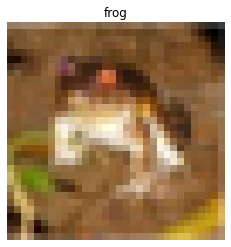

In [165]:
plt.imshow(transforms.ToPILImage()(image*0.5+0.5))  # Normalize 처리때문에 복구
plt.title("{}".format(dataset_train_CIFAR10.classes[label]))
plt.axis('off')
plt.show()

In [166]:
dataloader_train_CIFAR10 = DataLoader(dataset=dataset_train_CIFAR10,
                                      batch_size=16,
                                      shuffle=True,
                                      num_workers=4,
                                      )

In [167]:
images, labels = next(iter(dataloader_train_CIFAR10))

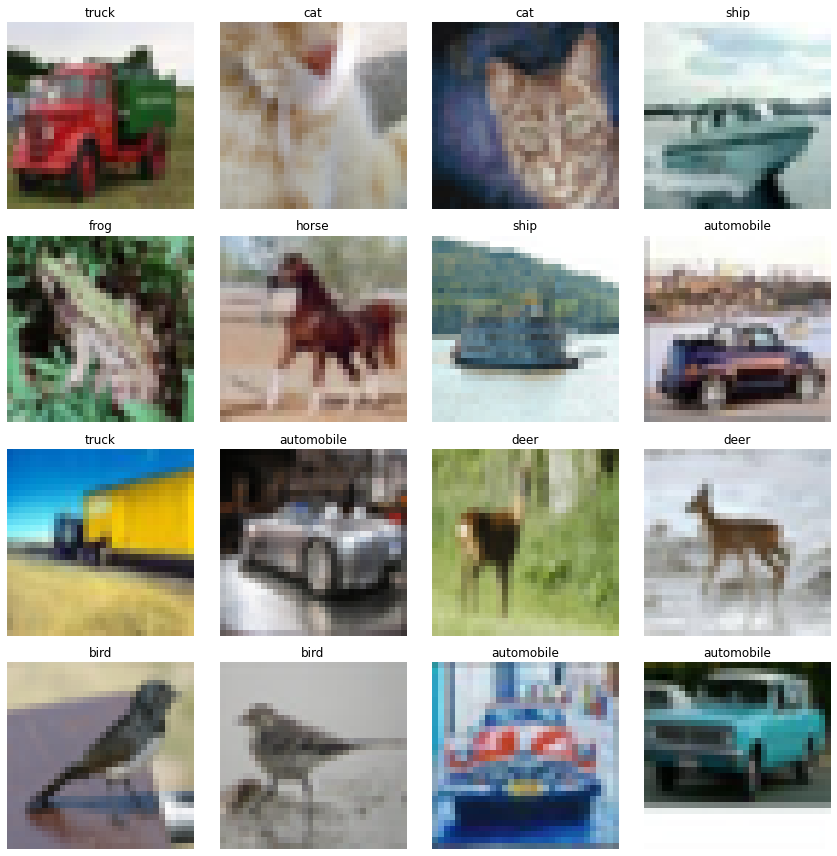

In [168]:
plt.figure(figsize=(12,12))
for n, (image, label) in enumerate(zip(images, labels), start=1):
    plt.subplot(4,4,n)
    plt.imshow(transforms.ToPILImage()(image*0.5+0.5))  # Normalize 처리때문에 복구
    plt.title("{}".format(dataset_train_CIFAR10.classes[label]))
    plt.axis('off')
plt.tight_layout()
plt.show()    

사실 torchvision에서는 이외에도 여러가지 dataset을 제공해줍니다.

In [ ]:
dir(torchvision.datasets)

['CIFAR10',
 'CIFAR100',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'DatasetFolder',
 'EMNIST',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'HMDB51',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'Kinetics400',
 'Kitti',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SVHN',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'caltech',
 'celeba',
 'cifar',
 'cityscapes',
 'coco',
 'fakedata',
 'flickr',
 'folder',
 'hmdb51',
 'imagenet',
 'kinetics',
 'kitti',
 'lsun',
 'mnist',
 'omniglot',
 'phototour',
 'places365',
 'sbd',
 'sbu',
 'semeion',
 'stl10',
 'svhn',
 'ucf101',
 'usps',
 'utils',
 'video_utils',
 'vision',
 'voc',
 'widerface']

### torchtext에서의 Dataset
---

#### AG_NEWS

AG 뉴스 데이터는 100만 개가 넘는 뉴스 기사 모음이다. ComeToMyHead가 1년 넘게 활동하면서 2000개 이상의 뉴스 출처에서 뉴스 기사를 수집했습니다. ComeToMyHead는 2004년 7월부터 운영되고 있는 학술 뉴스 검색 엔진입니다. 데이터셋은 데이터 마이닝(클러스터링, 분류 등), 정보 검색(순위, 검색 등), xml, 데이터 압축, 데이터 스트리밍 및 기타 모든 비상업적 활동에 대한 연구 목적으로 학계에서 제공합니다. 자세한 내용은 [링크](http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)를 참조하세요!

##### AG_NEWS Dataset

In [7]:
dataset_train_AG_NEWS, dataset_test_AG_NEWS = torchtext.datasets.AG_NEWS(root='./data')
classes = ['World', 'Sports', 'Business', 'Sci/Tech']

train.csv: 29.5MB [00:00, 88.4MB/s]
test.csv: 1.86MB [00:00, 60.3MB/s]                  


In [8]:
next(iter(dataset_train_AG_NEWS))


(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

In [19]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')
tokenizer('Hello World!')
tokenizer("I wanna go to Tokyo, for sure!")

['i', 'wanna', 'go', 'to', 'tokyo', ',', 'for', 'sure', '!']

In [23]:
dataset_train_AG_NEWS = list(dataset_train_AG_NEWS)
dataset_test_AG_NEWS = list(dataset_test_AG_NEWS)


In [69]:
counter = collections.Counter()
for (label, line) in dataset_train_AG_NEWS:
    counter.update(tokenizer(line))
vocab = torchtext.vocab.vocab(counter, min_freq=1)
print(vocab.get_stoi())
print(vocab.get_itos())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
vocab_size = len(vocab)
print(f"Vocab size is {vocab_size}")

Vocab size is 95809


In [13]:
def encode(x):
    return [vocab.get_stoi()[s] for n, s in enumerate(tokenizer(x))]

In [14]:
def decode(x):
    return [vocab.get_itos()[i] for n, i in enumerate(x)]

In [25]:
encode('I love to play with my words')

[598, 3278, 82, 1219, 328, 212, 7367]

In [30]:
decode(encode('I love to play with my words'))
decode([0])

['carlyle']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
        'I like hot dogs.',
        'The dog ran fast.',
        'Its hot outside .',
    ]
print(vectorizer.fit_transform(corpus))
vectorizer.transform(['My dog likes hot dogs on a hot day.']).toarray()

  (0, 5)	1
  (0, 3)	1
  (0, 1)	1
  (1, 8)	1
  (1, 0)	1
  (1, 7)	1
  (1, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 6)	1


array([[1, 1, 0, 2, 0, 0, 0, 0, 0]])

In [46]:
vocab_size = len(vocab)

def to_bow(text,bow_vocab_size=vocab_size):
    res = torch.zeros(bow_vocab_size,dtype=torch.float32)
    for i in encode(text):
        if i<bow_vocab_size:
            res[i] += 1
    return res

print(to_bow(dataset_train_AG_NEWS[0][1]))

tensor([2., 1., 1.,  ..., 0., 0., 0.])


#####  AG_NEWS DataLoader

In [50]:
# this collate function gets list of batch_size tuples, and needs to 
# return a pair of label-feature tensors for the whole minibatch
def bowify(b):
    return (
            torch.stack([to_bow(t[1]) for t in b]),
            torch.LongTensor([t[0]-1 for t in b]),
    )

In [51]:
dataloader_train_AG_NEWS = DataLoader(dataset_train_AG_NEWS, batch_size=4, collate_fn=bowify, shuffle=True)
dataloader_test_AG_NEWS = DataLoader(dataset_test_AG_NEWS, batch_size=4, collate_fn=bowify, shuffle=True)

In [52]:
next(iter(dataloader_train_AG_NEWS))

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([1, 3, 2, 3]))

> <font color='red'><b>HINT</b></font>: [Huggingface](https://huggingface.co/docs/datasets/)를 이용하면 훨씬 편하게 Dataset와 DataLoader를 사용할 수 있습니다. 보다 자세한 내용은 뒤에 이어지는 자연어처리 수업에서 배워보도록 합시다!

<img src="https://huggingface.co/front/thumbnails/datasets.png" width=50%>

## PyTorch의 Custom Dataset 과 DataLoader
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />

### (정형 데이터) Titanic 데이터로 Dataset과 DataLoader 만들어보기
---

Kaggle에서 데이터 다운이 어려우신 분들은 아래의 링크를 통해서 직접 다운 받을 수 있습니다.

```
!wget https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/train.csv -P data/titanic

!wget https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/test.csv  -P data/titanic
```

In [186]:
!wget https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/train.csv -P data/titanic

--2021-08-19 06:43:50--  https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/train.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘data/titanic/train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.004s  

2021-08-19 06:43:50 (13.2 MB/s) - ‘data/titanic/train.csv’ saved [60302/60302]



In [187]:
!wget https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/test.csv  -P data/titanic

--2021-08-19 06:43:55--  https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/test.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28210 (28K) [text/plain]
Saving to: ‘data/titanic/test.csv’

test.csv            100%[===================>]  27.55K  --.-KB/s    in 0s      

2021-08-19 06:43:55 (88.7 MB/s) - ‘data/titanic/test.csv’ saved [28210/28210]



In [188]:
os.listdir('./data/titanic/')

['test.csv', 'train.csv']

#### <font color='#5F71F7'>과제 HOMEWORK</font>

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>
            Kaggle에서 제공하는 <a href="https://www.kaggle.com/c/titanic/data">Titanic 데이터</a>를 다운로드 받아서 직접 <b>data/titanic</b> 폴더에 넣고 Custom Dataset과 DataLoader를 만들어봅시다!
        </li>
        <li>
            위에서 배운 Custom Dataset 클래스를 응용하여 TitanicDataset 클래스로 만들어봅시다
        </li>
    </ul>
    <br>
    <b> 해야할 일</b>
    <ul>
        <li>TitanicDataset을 완성해주세요.</li>
        <li>__init__함수에는 X,y 이외에도 features와 classes 를 포함해서 만들어주세요.</li>
        <li>__getitem__함수에는 X,y 반환하되, 학습 데이터가 아닐 경우, y를 반환하지 말아주세요.</li>
    </ul>
</div>

In [189]:
class TitanicDataset(Dataset):
    def __init__(self, path, drop_features, train=True):
        self.data = pd.read_csv(path)
        self.data['Sex'] = self.data['Sex'].map({'male':0, 'female':1})
        self.data['Embarked'] = self.data['Embarked'].map({'S':0, 'C':1, 'Q':2})
        ######################################TODO######################################
        self.drop_features = drop_features
        self.train = train
        self.features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
        self.X = self.data[self.features]
        self.classes = ['Dead', 'Survived']
        self.y = self.data['Survived']
        ################################################################################

    def __len__(self):
        len_dataset=None
        ######################################TODO######################################
        len_dataset = len(self.y)
        ################################################################################
        return len_dataset

    def __getitem__(self, idx):
        X, y = None, None
        ######################################TODO######################################
        X = self.X.iloc[idx]
        y = self.y[idx]
        ################################################################################
        return torch.tensor(X), torch.tensor(y)

In [224]:
dataset_train_titanic = TitanicDataset('./data/titanic/train.csv', 
                                       drop_features=['PassengerId', 'Name', 'Ticket', 'Cabin'],
                                       train=True)
dataset_train_titanic

In [192]:
dataset_train_titanic.features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [193]:
dataset_train_titanic.classes

['Dead', 'Survived']

In [ ]:
next(iter(dataset_train_titanic))

(tensor([ 3.0000,  0.0000, 22.0000,  1.0000,  0.0000,  7.2500,  0.0000],
        dtype=torch.float64), tensor(0))

In [194]:
dataloader_train_titanic = DataLoader(dataset=dataset_train_titanic,
                                      batch_size=8,
                                      shuffle=True,
                                      num_workers=4,
                                      )

In [197]:
features, labels = next(iter(dataloader_train_titanic))

In [198]:
features

tensor([[ 2.0000,  0.0000, 29.0000,  0.0000,  0.0000, 10.5000,  0.0000],
        [ 3.0000,  1.0000, 21.0000,  0.0000,  0.0000,  7.7500,  2.0000],
        [ 2.0000,  0.0000, 19.0000,  0.0000,  0.0000, 10.5000,  0.0000],
        [ 3.0000,  0.0000, 26.0000,  0.0000,  0.0000,  8.0500,  0.0000],
        [ 2.0000,  0.0000, 21.0000,  0.0000,  0.0000, 73.5000,  0.0000],
        [ 2.0000,  1.0000, 50.0000,  0.0000,  0.0000, 10.5000,  0.0000],
        [ 3.0000,  0.0000, 42.0000,  0.0000,  0.0000,  7.6500,  0.0000],
        [ 1.0000,  0.0000, 39.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       dtype=torch.float64)

In [199]:
labels

tensor([0, 0, 0, 0, 0, 1, 0, 0])

### (이미지 데이터) MNIST 데이터로 Dataset과 DataLoader 만들어보기
---

`torchvision`에서 제공해주던 Dataset을 다시 한번 확인해봅시다.

```python
torchvision.datasets.MNIST(root: str,
                           train: bool = True,
                           transform: Optional[Callable] = None,
                           target_transform: Optional[Callable] = None, 
                           download: bool = False
                          )
```

이번에는 MNIST 원본 데이터를 이용해서 우리만의 Dataset을 직접 만들어봅시다.

In [205]:
os.listdir('data/MNIST/MNIST/raw')  # 데이터가 없다면 torchvision에서 직접 다운로드 하셔야합니다!


['t10k-images-idx3-ubyte',
 't10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 't10k-labels-idx1-ubyte',
 'train-labels-idx1-ubyte',
 'train-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte',
 'train-images-idx3-ubyte.gz']

#### <font color='#5F71F7'>과제 HOMEWORK</font>

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>
            앞서 다운로드 받은 MNIST 데이터를 통해서 직접 자신만의 Dataset 만들어봅시다.
        </li>
        <li>
            더 공부해보고 싶으시다면 구현을 완성한 후에 <a href="https://pytorch.org/vision/stable/_modules/torchvision/datasets/mnist.html#MNIST">파이토치 공식 문서</a>와 얼마나 비슷한지 비교해봅시다!
        </li>
    </ul>
    <br>
    <b> 해야할 일</b>
    <ul>
        <li>MyMNISTDataset을 완성해주세요.</li>
        <li>학습 데이터</li>
            <ul>- 이미지: train-images-idx3-ubyte.gz</ul>
            <ul>- 레이블: train-labels-idx1-ubyte.gz</ul>
        <li>평가 데이터</li>
            <ul>- 이미지: t10k-images-idx3-ubyte.gz</ul>
            <ul>- 레이블: t10k-labels-idx1-ubyte.gz</ul>
        <li>__getitem__함수에는 X,y 반환하되, 학습 데이터가 아닐 경우, y를 반환하지 말아주세요. 또한 transform 인자가 있다면 이미지를 처리하는 transform 코드를 넣어주세요.</li>
    </ul>
</div>

In [1]:
BASE_MNIST_PATH = 'data/MNIST/MNIST/raw'
TRAIN_MNIST_IMAGE_PATH = os.path.join(BASE_MNIST_PATH, 'train-images-idx3-ubyte.gz')
TRAIN_MNIST_LABEL_PATH = os.path.join(BASE_MNIST_PATH, 'train-labels-idx1-ubyte.gz')
TEST_MNIST_IMAGE_PATH = os.path.join(BASE_MNIST_PATH, 't10k-images-idx3-ubyte.gz')
TEST_MNIST_LABEL_PATH = os.path.join(BASE_MNIST_PATH, 't10k-labels-idx1-ubyte.gz')

NameError: ignored

In [207]:
TRAIN_MNIST_PATH = {
    'image': TRAIN_MNIST_IMAGE_PATH,
    'label': TRAIN_MNIST_LABEL_PATH
}

TEST_MNIST_PATH = {
    'image': TEST_MNIST_IMAGE_PATH,
    'label': TEST_MNIST_LABEL_PATH
}

In [204]:
# MNIST RAW 데이터를 가져오는 함수
# https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
def read_MNIST_images(path):
    with gzip.open(path, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def read_MNIST_labels(path):
    with gzip.open(path, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [231]:
temp = read_MNIST_labels(TRAIN_MNIST_LABEL_PATH)
print(temp)

[5 0 4 ... 5 6 8]


In [244]:
class MyMNISTDataset(Dataset):
    def __init__(self, path, transform=None, train=True):
        ######################################TODO######################################
        self.path = path
        self.transform = transform
        self.train = train   
        self.X_train = read_MNIST_images(TRAIN_MNIST_PATH['image'])
        self.y_train = read_MNIST_labels(TRAIN_MNIST_PATH['label'])
        self.X_test = read_MNIST_images(TEST_MNIST_PATH['image'])
        self.y_test = read_MNIST_labels(TEST_MNIST_PATH['label'])
        self._repr_indent = 4
        self.classes = [0,1,2,3,4,5,6,7,8,9]
        ################################################################################

    def __len__(self):
        len_dataset = None
        ######################################TODO######################################
        if self.train == True:
            len_dataset = len(self.y_train)
        else:
            len_dataset = len(self.y_test)
        ################################################################################
        return len_dataset

    def __getitem__(self, idx):
        X,y = None, None
        ######################################TODO######################################

        if self.train == True:
            if self.transform != None:
                X = self.transform(self.X_train[idx])
            else:   
                X = self.X_train[idx]
            y = self.y_train[idx]
        else:
            if self.transform != None:
                X = self.transform(self.X_test[idx])
            else:
                X = self.X_test[idx]
            y = self.y_test[idx]
        
        ################################################################################
        return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)

    def __repr__(self):
        '''
        https://github.com/pytorch/vision/blob/master/torchvision/datasets/vision.py
        '''
        head = "(PyTorch HomeWork) My Custom Dataset : MNIST"
        data_path = self._repr_indent*" " + "Data path: {}".format(self.path['image'])
        label_path = self._repr_indent*" " + "Label path: {}".format(self.path['label'])
        num_data = self._repr_indent*" " + "Number of datapoints: {}".format(self.__len__())
        num_classes = self._repr_indent*" " + "Number of classes: {}".format(len(self.classes))

        return '\n'.join([head,
                          data_path, label_path, 
                          num_data, num_classes])

In [245]:
dataset_train_MyMNIST = MyMNISTDataset(path=TRAIN_MNIST_PATH,
                                       transform=transforms.Compose([
                                           transforms.ToTensor()
                                       ]),
                                       train=True
                                       )

In [234]:
dataset_train_MNIST

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [235]:
dataset_train_MyMNIST

(PyTorch HomeWork) My Custom Dataset : MNIST
    Data path: data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz
    Label path: data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz
    Number of datapoints: 60000
    Number of classes: 10

In [236]:
len(dataset_train_MyMNIST)

60000

In [246]:
image, label = next(iter(dataset_train_MyMNIST))
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

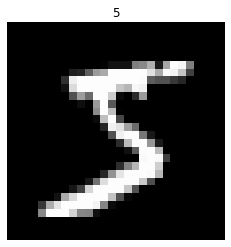

In [248]:
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.title("{}".format(dataset_train_MyMNIST.classes[label]))
plt.axis('off')
plt.show()

In [249]:
dataloader_train_MNIST = DataLoader(dataset=dataset_train_MyMNIST,
                                    batch_size=16,
                                    shuffle=True,
                                    num_workers=4,
                                    )

In [250]:
images, labels = next(iter(dataloader_train_MNIST))

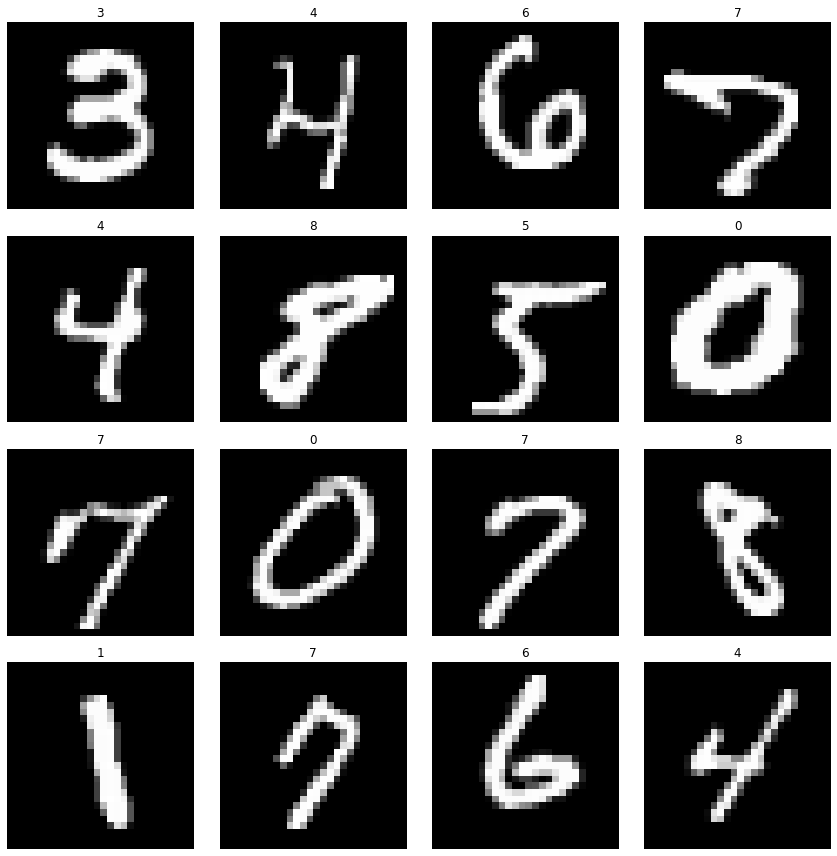

In [251]:
plt.figure(figsize=(12,12))
for n, (image, label) in enumerate(zip(images, labels), start=1):
    plt.subplot(4,4,n)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title("{}".format(dataset_train_MyMNIST.classes[label]))
    plt.axis('off')
plt.tight_layout()
plt.show()    

> <font color='red'><b>HINT</b></font>: torchvision에서는 `datasets.ImageFolder`를 통해서 폴더를 아래와 같이 클래스별로 나누고 해당 경로를 지정해두면 손쉽게 Dataset을 생성할 수 있습니다. 

```bash
    data/train/ants/xxx.png
    data/train/ants/xxy.jpeg
    data/train/ants/xxz.png
    .
    .
    .
    data/train/bees/123.jpg
    data/train/bees/nsdf3.png
    data/train/bees/asd932_.png
```

```python

dataset_train = datasets.ImageFolder(root='data/train', transform=transform_train)
```

### (텍스트 데이터) AG_NEWS 데이터를 이용하여 Dataset과 DataLoader 만들어보기
---

In [54]:
os.listdir('data/AG_NEWS')

['test.csv', 'train.csv']

#### <font color='#5F71F7'>과제 HOMEWORK</font>

<div style="background:rgb(77,85,245,0.2);padding:20px;margin: 20px;color:black;">
    <b>과제 설명</b>
    <ul>
        <li>
            앞서 다운로드 받은 AG NEWS 데이터를 통해서 직접 자신만의 Dataset 만들어봅시다.
        </li>
        <li>
            모두 구현해보면 파이토치 공식 문서와 얼마나 비슷한지 비교해봅시다!
        </li>
    </ul>
    <br>
    <b> 해야할 일</b>
    <ul>
        <li>MyAG_NEWSDataset을 완성해주세요.</li>
        <li>__init__함수에는 X,y 이외에도 class와 vocab과 encoder 및 decoder까지 같이 넣어주세요.</li>
        <li>__getitem__함수에는 X,y 반환하되, 학습 데이터가 아닐 경우, y를 반환하지 말아주세요.</li>
        <li>_preprocess함수에는 영어와 숫자를 제외한 모든 문자를 제외시키고 영어는 모두 소문자로 변환하여 주세요.</li>
    </ul>
</div>

In [67]:
BASE_AG_NEWS_PATH = 'data/AG_NEWS'
TRAIN_AG_NEWS_PATH = os.path.join(BASE_AG_NEWS_PATH, 'train.csv')
TEST_AG_NEWS_PATH = os.path.join(BASE_AG_NEWS_PATH, 'test.csv')
df=pd.read_csv('./data/AG_NEWS/train.csv', sep=',', header=None, names=['class','title','description'])
y = df["class"]
x = df["title"]
print(tokenizer(x[0]))

['wall', 'st', '.', 'bears', 'claw', 'back', 'into', 'the', 'black', '(', 'reuters', ')']


In [71]:
class MyAG_NEWSDataset(Dataset):
    def __init__(self, path='./data/AG_NEWS/train.csv', train=True):
        tqdm.pandas()
        self._repr_indent = 4
        self.data = pd.read_csv(path, sep=',', header=None, names=['class','title','description'])
        ######################################TODO######################################
        self.path = path
        self.train = train
        self.X = self.data['title']
        self.y = self.data['class']
        self.classes = ['World', 'Sports', 'Business', 'Sci/Tech']
        counter = collections.Counter()
        for x in self.X:
            counter.update(tokenizer(x))
        self.vocab = torchtext.vocab.vocab(counter, min_freq=1)
        self.encoder = self.vocab.get_stoi()
        self.decoder = self.vocab.get_itos()
        ################################################################################

    def __len__(self):
        len_dataset = None
        ######################################TODO######################################
        len_dataset = len(self.data['class'])
        ################################################################################
        return len_dataset

    def __getitem__(self, idx):
        X,y = None, None
        ######################################TODO######################################
        X= self.X[idx]
        y= self.y[idx]
        ################################################################################
        return y, X 

    def __repr__(self):
        '''
        https://github.com/pytorch/vision/blob/master/torchvision/datasets/vision.py
        '''
        head = "(PyTorch HomeWork) My Custom Dataset : AG_NEWS"
        data_path = self._repr_indent*" " + "Data path: {}".format(self.path)
        num_data = self._repr_indent*" " + "Number of datapoints: {}".format(self.__len__())
        num_classes = self._repr_indent*" " + "Number of classes: {}".format(len(self.classes))

        return '\n'.join([head, data_path, num_data, num_classes])
    
    def _preprocess(self, s):
        '''
        본인이 원하는 전처리 방법을 넣어보세요
        본 과제에서는 간단한 전처리만 예시로 넣어뒀습니다.
        (특수문자: -=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》 등)
        '''
        ######################################TODO######################################
        pass
        ################################################################################
        return s

In [72]:
dataset_train_MyAG_NEWS = MyAG_NEWSDataset(TRAIN_AG_NEWS_PATH, train=True)

In [73]:
dataset_train_MyAG_NEWS

(PyTorch HomeWork) My Custom Dataset : AG_NEWS
    Data path: data/AG_NEWS/train.csv
    Number of datapoints: 120000
    Number of classes: 4

In [74]:
dataset_train_MyAG_NEWS.classes

['World', 'Sports', 'Business', 'Sci/Tech']

In [ ]:
len(dataset_train_MyAG_NEWS.vocab)  # 지금은 간단한 전처리만 했으므로 값이 다를 수 있음

102171

In [ ]:
dataset_train_MyAG_NEWS.encoder['hello']

57

In [ ]:
next(iter(dataset_train_MyAG_NEWS))

(3,
 'wall st bears claw back into the black reuters reuters  shortsellers wall streets dwindlingband of ultracynics are seeing green again')

In [ ]:
vocab_size = len(dataset_train_MyAG_NEWS.vocab)

def custom_to_bow(text,bow_vocab_size=vocab_size):
    res = torch.zeros(bow_vocab_size,dtype=torch.float32)
    for n, i in enumerate(text.split(' ')):
        idx = dataset_train_MyAG_NEWS.encoder[i]
        if idx<bow_vocab_size:
            res[idx] += 1
    return res

print(custom_to_bow(dataset_train_MyAG_NEWS[0][1]))

tensor([1., 0., 0.,  ..., 0., 0., 0.])


In [ ]:
def custom_bowify(b):
    return (
            torch.stack([custom_to_bow(t[1]) for t in b]),
            torch.LongTensor([t[0]-1 for t in b]),
    )

In [ ]:
dataloader_train_AGNEWS = DataLoader(dataset_train_MyAG_NEWS, 
                                     batch_size=4,
                                     collate_fn=custom_bowify, 
                                     shuffle=True)

In [ ]:
next(iter(dataloader_train_AGNEWS))

(tensor([[4., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([2, 3, 0, 3]))

## 요약 및 정리
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />
과제는 어렵지 않으셨을거에요! 이제 마지막으로 여러분들을 위해 한장 요약을 해드릴게요! 앞으로 5개월간 PyTorch를 쓰시면서 전반적인 흐름을 익히시는데 도움되길 바랍니다!

### Dataset
```python
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self,):
        '''
        데이터의 위치나 파일명과 같은 초기화 작업을 위해 동작
        '''
        pass

    def __len__(self):
        '''
        Dataset의 최대 요소 수를 반환하는데 사용
        '''
        pass
    
    def __getitem__(self, idx):
        '''
        데이터셋의 idx번째 데이터를 반환하는데 사용
        '''
        pass
    
dataset_custom = CustomDataset()
```

### DataLoader
```python
DataLoader(dataset,            # Dataset 인스턴스가 들어감
           batch_size=1,       # 배치 사이즈를 설정
           shuffle=False,      # 데이터를 섞어서 사용하겠는지를 설정
           sampler=None,       # sampler는 index를 컨트롤
           batch_sampler=None, # 위와 비슷하므로 생략
           num_workers=0,      # 데이터를 불러올때 사용하는 서브 프로세스 개수
           collate_fn=None,    # map-style 데이터셋에서 sample list를 batch 단위로 바꾸기 위해 필요한 기능
           pin_memory=False,   # Tensor를 CUDA 고정 메모리에 할당
           drop_last=False,    # 마지막 batch를 사용 여부
           timeout=0,          # data를 불러오는데 제한시간
           worker_init_fn=None # 어떤 worker를 불러올 것인가를 리스트로 전달
          )

dataloader_custom = DataLoader(dataset_custom)
```

### 일반적인 학습 과정
보통은 여러분들이 어떤 프로젝트를 진행하시든지 아래와 같은 구조를 `train.py`에 넣어서 한꺼번에 실행시킬 거에요. 학습하실 때 큰 그림 잡을 수 있길 바랍니다!

```python
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader 
from network import CustomNet
from dataset import ExampleDataset
from loss import ExampleLoss

###############################
# 첫번째 과제 Custom modeling #
###############################

# 모델 생성
model = CustomNet()
model.train()

# 옵티마이저 정의
params = [param for param in model.parameters() if param.requires_grad]
optimizer = optim.Example(params, lr=lr)

# 손실함수 정의
loss_fn = ExampleLoss()

###########################################
# 두번째 과제 Custom Dataset & DataLoader # -> 이번에는 여기까지 공부하셨어요!!
###########################################

# 학습을 위한 데이터셋 생성
dataset_example = ExampleDataset()

# 학습을 위한 데이터로더 생성
dataloader_example = DataLoader(dataset_example)

##########################################################
# 세번째 과제 Transfer Learning & Hyper Parameter Tuning # 
##########################################################
for e in range(epochs):
    for X,y in dataloader_example:
        output = model(X)
        loss = loss_fn(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

## QnA
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />
<br>
<br>
<br>
<br>
<br>
<div align='center'><font size=5><b>궁금하신 점 있으신가요?</b></font></div>
<br>
<div align='center'><font size=5>슬랙 채널을 통해서 언제든지 질문주세요!</font></div>
<br>
<div align='center'><font size=5>여기까지 오시느라 모두 고생 많으셨습니다 :)</font></div>
<br>
<br>
<br>
<br>
<br>
<div align='right'><font size=3>멘토 성민석 드림</font></div>
<br>
<br>

## Reference
<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7;" />

- https://nbviewer.jupyter.org/gist/minsuk-sung/1da11fff6fcd67037d60eb84cb25708b
- https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

- https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html
- https://d2.naver.com/helloworld/3773258
- https://github.com/utkuozbulak/pytorch-custom-dataset-examples
- https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-pytorch/3-data?ns-enrollment-type=LearningPath&ns-enrollment-id=learn.pytorch.pytorch-fundamentals

- https://choice-life.tistory.com/18
- https://www.kaeee.de/2021/04/29/pytorch-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%A1%9C%EB%8D%94-%EB%A7%8C%EB%93%A4%EA%B8%B0.html
- https://data-panic.tistory.com/13
- https://data-panic.tistory.com/21
- https://dacon.io/codeshare/2434
- https://sanghyu.tistory.com/90
- https://wikidocs.net/57165
- http://cedartrees.co.kr/index.php/2020/06/24/pytorch-dataloader-example/
- https://blog.promedius.ai/pytorch_dataloader_1/
- https://smha-61749.medium.com/pytorch-%EB%82%98%EB%A7%8C%EC%9D%98-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C-dataloader-%EC%9E%91%EC%84%B1%ED%95%98%EA%B8%B0-1-c1d785a9b871
- https://subinium.github.io/pytorch-dataloader/
- http://www.gisdeveloper.co.kr/?p=8615
- https://truman.tistory.com/223
- https://blog.naver.com/PostView.nhn?blogId=reisei11&logNo=221733757476&redirect=Dlog&widgetTypeCall=true&directAccess=false
- https://anweh.tistory.com/23
- https://velog.io/@kwanhong66/PyTorch-x-Kaggle-PyTorch-Custom-Dataset-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0
- https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/03_01_dataloader.html